In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


C:\Users\user\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# # Walk through "data" folder, printing directories and files 
# # to use their names for file paths

# for root, dirs, files in os.walk("data"):
#     print("Current Directory:", root)
#     print()
#     print("Subdirectories:", dirs)
#     print()
#     print("Files:", files)

In [3]:
main_dir = 'data/processed'
file_name = 'customer_segmentation.csv'
file_path = os.path.join(main_dir, file_name)

In [4]:
df = pd.read_csv(file_path, index_col='Customer ID')

In [5]:
df.head()

,Age,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level,New_York_Young_Adults,New_York_Middle-aged_Adults,Los_Angeles_Young_Adults,...,Gender_Male,City_Chicago,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Bronze,Membership Type_Gold,Membership Type_Silver
Customer ID,,,,,,,,,,,,,,,,,,,,,
101,0.176471,0.639502,0.500000,0.842105,1.0,0.296296,0.333333,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
102,0.470588,0.333273,0.285714,0.578947,0.0,0.166667,0.000000,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
103,1.000000,0.090102,0.142857,0.210526,1.0,0.611111,0.666667,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
104,0.235294,0.964122,0.857143,0.894737,0.0,0.055556,0.333333,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
105,0.058824,0.279095,0.428571,0.526316,1.0,0.851852,0.666667,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# use Elbow Method and Silhouette 

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows wi

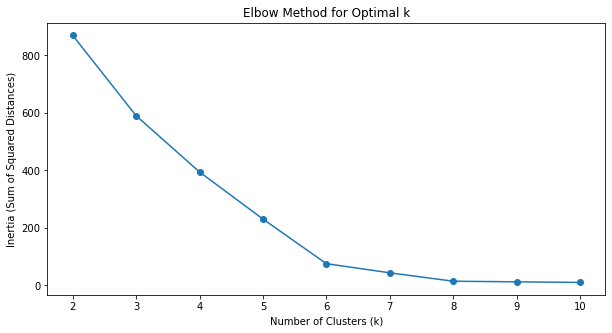

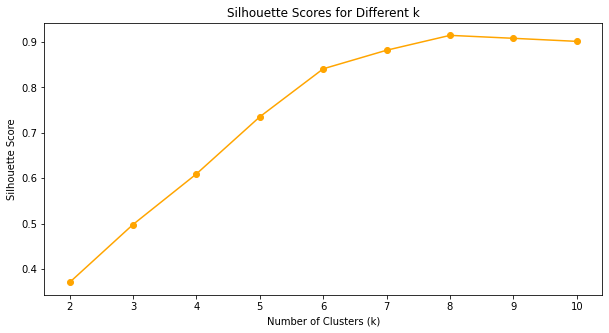

In [6]:
# Store the inertia (sum of squared distances) and silhouette scores
inertia = []
silhouette_scores = []

# Iterate over different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df)  # Assuming 'data' contains your normalized dataset

    # Append inertia and silhouette scores
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='orange')
plt.title("Silhouette Scores for Different k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


# Run k-means

In [7]:
k = 6  # Replace with the chosen number of clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Cluster centroids
centroids = kmeans.cluster_centers_
print("Centroids:\n", centroids)

Centroids:
 [[ 6.29817444e-01  3.25383824e-02  4.06403941e-02  1.01633394e-01
   0.00000000e+00  2.54789272e-01  3.44827586e-02 -2.77555756e-17
   4.16333634e-17 -2.16840434e-18  1.38777878e-16  0.00000000e+00
   1.38777878e-16  2.77555756e-17 -2.16840434e-18  4.16333634e-17
   2.77555756e-17  0.00000000e+00  1.00000000e+00  1.00000000e+00
   0.00000000e+00  1.38777878e-16  1.00000000e+00  1.38777878e-16
   1.38777878e-16  1.38777878e-16  1.38777878e-16  1.00000000e+00
  -1.66533454e-16 -1.66533454e-16]
 [ 1.83569980e-01  9.45616527e-01  9.28571429e-01  9.51905626e-01
   0.00000000e+00  4.02298851e-02  3.33333333e-01 -2.77555756e-17
   4.16333634e-17 -2.60208521e-18  1.38777878e-16  0.00000000e+00
   1.38777878e-16  9.82758621e-01  1.72413793e-02  4.16333634e-17
   2.77555756e-17  0.00000000e+00  1.38777878e-16  0.00000000e+00
   1.00000000e+00  1.38777878e-16  1.38777878e-16  1.38777878e-16
   1.38777878e-16  1.38777878e-16  1.00000000e+00  2.77555756e-16
   1.00000000e+00 -1.66533454

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


## visualize clusters

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


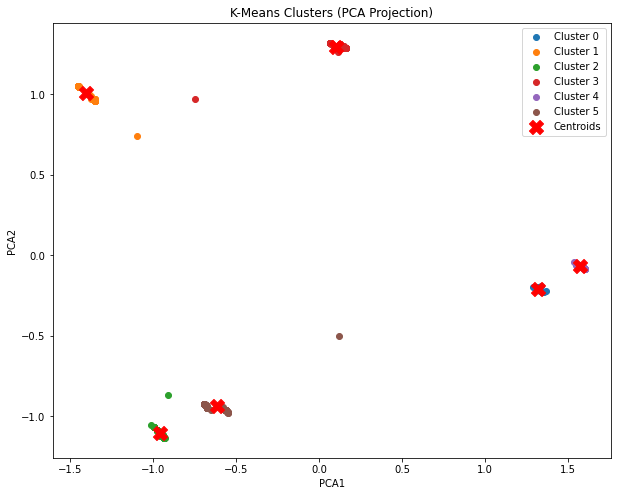

In [8]:
# Ensure only the original feature columns are used for PCA
original_features = df.drop(columns=['Cluster', 'PCA1', 'PCA2'], errors='ignore')

# Refit PCA with the correct number of features
pca = PCA(n_components=2)
data_pca = pca.fit_transform(original_features)

# Add PCA components to the dataset
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 8))
for cluster in range(k):
    plt.scatter(df[df['Cluster'] == cluster]['PCA1'],
                df[df['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}')
# Transform the centroids for PCA visualization
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
            color='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clusters (PCA Projection)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()


## cluster sizes

In [9]:
cluster_sizes = df['Cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)

Cluster Sizes:
 Cluster
3    59
2    59
4    58
1    58
5    58
0    58
Name: count, dtype: int64


## analyze clusters

In [10]:
cluster_profiles = df.groupby('Cluster').mean()
print("Cluster Profiles:\n", cluster_profiles)

Cluster Profiles:
               Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                           
0        0.629817     0.032538         0.040640        0.101633   
1        0.183570     0.945617         0.928571        0.951906   
2        0.477567     0.355802         0.334140        0.617306   
3        0.277168     0.679920         0.590799        0.812667   
4        0.942191     0.080305         0.172414        0.240472   
5        0.173428     0.252042         0.331281        0.488203   

         Discount Applied  Days Since Last Purchase  Satisfaction Level  \
Cluster                                                                   
0                     0.0                  0.254789            0.034483   
1                     0.0                  0.040230            0.333333   
2                     0.0                  0.116133            0.045198   
3                     1.0                  0.288763            0.3333

## evaluate clusters

In [11]:
silhouette_avg = silhouette_score(df.drop(columns=['Cluster', 'PCA1', 'PCA2']), df['Cluster'])
print(f"Silhouette Score for k={k}: {silhouette_avg}")

Silhouette Score for k=6: 0.84119667706446
